# Project: Analysis of Sexual Violence Incidents in Nigeria
Author: Adedokun Marvellous
## Description: 
This project analyzes reported sexual violence incidents in Nigeria 
from 2020-2025, providing insights into trends, perpetrators, victims, 
and geographic hotspots. The outputs include summary statistics, visualizations, 
and interactive heatmaps for use in blogs or reports.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('../data/2020-2025-nga-conflict-related-sexual-violence-incident-data.csv'
)
df.head()

,Date,Event Description,Country,Country ISO,Admin 1,Latitude,Longitude,Geo Precision,Location Where Sexual Violence Was Committed,Reported Perpetrator,...,Weapon Carried/Used,Survivor or Victim,Survivor Or Victim Sex,Adult or Minor,Type of SV,SV Context,Classification,Number of Reported Victims,Reported Deaths Following the Sexual Violence,SIND Event ID
0,2025-03-18,NaN,Nigeria,NGA,Bayelsa State,4.9,6.2,(2) 25 km Precision,Livelihood Activity,Other,...,No Information on the Weapon Used,Civilian,Female,"Adult,",Rape,CRSV,Gang SV AssaultGang SV Assault,1,NaN,99162
1,2025-03-18,NaN,Nigeria,NGA,Delta State,5.5,5.7,"(3) District, Communicipality or Commune",No Information,NSA,...,Knife,Civilian,Female,"Minor,",Rape,CRSV,Gang SV AssaultGang SV Assault,1,1.0,99161
2,2025-02-17,NaN,Nigeria,NGA,Enugu State,6.6,7.7,(2) 25 km Precision,No Information,Other,...,"Stones, Sticks and Gravel",Civilian,Female,"Adult,",Rape,CRSV,Gang SV AssaultGang SV Assault,1,NaN,99163
3,2024-12-08,NaN,Nigeria,NGA,Delta State,5.5,6.0,(2) 25 km Precision,No Information,No Information,...,Firearms,Civilian,Female,"Minor,",Rape,Other,Single Rape/SV Assault,1,NaN,87796
4,2024-10-10,NaN,Nigeria,NGA,Edo State,6.6,5.9,"(4) Province, State, Governorate",Police Station,Police,...,Firearms,Civilian,Female,"Minor,",Rape,SV by security personnel,Single Rape/SV Assault,1,NaN,85810


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Date                                           84 non-null     object 
 1   Event Description                              0 non-null      float64
 2   Country                                        84 non-null     object 
 3   Country ISO                                    84 non-null     object 
 4   Admin 1                                        84 non-null     object 
 5   Latitude                                       84 non-null     float64
 6   Longitude                                      84 non-null     float64
 7   Geo Precision                                  84 non-null     object 
 8   Location Where Sexual Violence Was Committed   84 non-null     object 
 9   Reported Perpetrator                           84 non-nu

In [4]:
df.isnull().sum()

Date                                              0
Event Description                                84
Country                                           0
Country ISO                                       0
Admin 1                                           0
Latitude                                          0
Longitude                                         0
Geo Precision                                     0
Location Where Sexual Violence Was Committed      0
Reported Perpetrator                              0
Reported Perpetrator Name                         0
Single And Group Perpetrators                     0
Weapon Carried/Used                               0
Survivor or Victim                                0
Survivor Or Victim Sex                            0
Adult or Minor                                    0
Type of SV                                        0
SV Context                                        0
Classification                                    0
Number of Re

In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [6]:
df['Reported Deaths Following the Sexual Violence'] = df['Reported Deaths Following the Sexual Violence'].fillna(0)

In [7]:
df= df.drop(columns=['Event Description'])


In [8]:
df.isnull().sum()

Date                                             0
Country                                          0
Country ISO                                      0
Admin 1                                          0
Latitude                                         0
Longitude                                        0
Geo Precision                                    0
Location Where Sexual Violence Was Committed     0
Reported Perpetrator                             0
Reported Perpetrator Name                        0
Single And Group Perpetrators                    0
Weapon Carried/Used                              0
Survivor or Victim                               0
Survivor Or Victim Sex                           0
Adult or Minor                                   0
Type of SV                                       0
SV Context                                       0
Classification                                   0
Number of Reported Victims                       0
Reported Deaths Following the S

In [9]:
df

,Date,Country,Country ISO,Admin 1,Latitude,Longitude,Geo Precision,Location Where Sexual Violence Was Committed,Reported Perpetrator,Reported Perpetrator Name,...,Weapon Carried/Used,Survivor or Victim,Survivor Or Victim Sex,Adult or Minor,Type of SV,SV Context,Classification,Number of Reported Victims,Reported Deaths Following the Sexual Violence,SIND Event ID
0,2025-03-18,Nigeria,NGA,Bayelsa State,4.9,6.2,(2) 25 km Precision,Livelihood Activity,Other,Fulani herdsmen,...,No Information on the Weapon Used,Civilian,Female,"Adult,",Rape,CRSV,Gang SV AssaultGang SV Assault,1,0.0,99162
1,2025-03-18,Nigeria,NGA,Delta State,5.5,5.7,"(3) District, Communicipality or Commune",No Information,NSA,Unidentified Armed Actor,...,Knife,Civilian,Female,"Minor,",Rape,CRSV,Gang SV AssaultGang SV Assault,1,1.0,99161
2,2025-02-17,Nigeria,NGA,Enugu State,6.6,7.7,(2) 25 km Precision,No Information,Other,Fulani herdsmen,...,"Stones, Sticks and Gravel",Civilian,Female,"Adult,",Rape,CRSV,Gang SV AssaultGang SV Assault,1,0.0,99163
3,2024-12-08,Nigeria,NGA,Delta State,5.5,6.0,(2) 25 km Precision,No Information,No Information,Unidentified Armed Actor,...,Firearms,Civilian,Female,"Minor,",Rape,Other,Single Rape/SV Assault,1,0.0,87796
4,2024-10-10,Nigeria,NGA,Edo State,6.6,5.9,"(4) Province, State, Governorate",Police Station,Police,Nigeria Police Force,...,Firearms,Civilian,Female,"Minor,",Rape,SV by security personnel,Single Rape/SV Assault,1,0.0,85810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2020-12-29,Nigeria,NGA,Ogun State,7.1,2.8,"(3) District, Communicipality or Commune","Street, Road or Field",Other,Fulani herdsmen,...,Firearms,Civilian,Female,"Adult,",Rape,CRSV,Mass SV Assault,4,0.0,27670
80,2020-08-11,Nigeria,NGA,Ogun State,6.5,3.4,"(4) Province, State, Governorate",School,Employee,Employee,...,Unarmed Perpetrator,Civilian,Female,"Minor,",Rape,Safeguarding,Single Rape/SV Assault,1,0.0,25739
81,2020-05-08,Nigeria,NGA,Delta State,6.2,6.6,(2) 25 km Precision,No Information,NSA,Militia,...,Firearms,Civilian,Female,"Adult,",Rape,CRSV,Mass SV Assault,2,0.0,25551
82,2020-04-03,Nigeria,NGA,Enugu State,6.5,7.4,(2) 25 km Precision,No Information,Other,Fulani herdsmen,...,Firearms,Civilian,Female,"Adult,",Rape,CRSV,Gang SV AssaultGang SV Assault,1,0.0,25468


In [10]:
df['Date']

0    2025-03-18
1    2025-03-18
2    2025-02-17
3    2024-12-08
4    2024-10-10
        ...    
79   2020-12-29
80   2020-08-11
81   2020-05-08
82   2020-04-03
83   2020-03-05
Name: Date, Length: 84, dtype: datetime64[ns]

In [11]:
# Step 3: Top-level summaries
# Total incidents per year
df['Year'] = df['Date'].dt.year
incidents_per_year = df.groupby('Year').size().reset_index(name='Total Incidents')
print("Incidents per year:\n", incidents_per_year)

Incidents per year:
    Year  Total Incidents
0  2020                5
1  2021               14
2  2022               26
3  2023               19
4  2024               17
5  2025                3


In [12]:
#Most affected states
incidents_per_state = df.groupby('Admin 1').size().reset_index(name='Total Incidents').sort_values(by='Total Incidents', ascending=False)
print("\nMost affected states:\n", incidents_per_state)


Most affected states:
                       Admin 1  Total Incidents
22                 Ogun State                8
29              Zamfara State                7
8                 Delta State                7
5                 Benue State                5
12                Enugu State                5
26               Rivers State                4
6                 Borno State                4
28               Taraba State                4
21                Niger State                4
13  Federal Capital Territory                4
14                  Imo State                3
25              Plateau State                2
23                 Ondo State                2
17              Katsina State                2
20             Nasarawa State                2
19                Lagos State                2
18                Kwara State                2
0                  Abia State                2
10                  Edo State                2
7           Cross River State       

In [13]:
#Most frequent perpetrators
incidents_per_perpetrator = df.groupby('Reported Perpetrator Name').size().reset_index(name='Total Incidents').sort_values(by='Total Incidents', ascending=False)
print("\nMost frequent perpetrators:\n", incidents_per_perpetrator)


Most frequent perpetrators:
    Reported Perpetrator Name  Total Incidents
12  Unidentified Armed Actor               39
4            Fulani herdsmen               16
6                    Militia                6
9      Nigerian Armed Forces                5
8       Nigeria Police Force                4
1                 Boko Haram                3
10            No Information                3
2                   Criminal                2
3                   Employee                2
0              Beneficiaries                1
5              Health worker                1
7         Niger Armed Forces                1
11          Private security                1


In [14]:
#Victim demographics: Adult vs Minor
victim_age_dist = df.groupby('Adult or Minor ').size().reset_index(name='Count')
print("\nVictim age distribution:\n", victim_age_dist)


Victim age distribution:
   Adult or Minor   Count
0         Adult,      66
1         Minor,      15
2   Unspecified,       3


In [15]:
# 5. Victim demographics: Sex
victim_sex_dist = df.groupby('Survivor Or Victim Sex').size().reset_index(name='Count')
print("\nVictim sex distribution:\n", victim_sex_dist)


Victim sex distribution:
   Survivor Or Victim Sex  Count
0                 Female     81
1                   Male      1
2                Unclear      2


In [16]:
#Top weapons used
weapons_dist = df.groupby('Weapon Carried/Used').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
print("\nWeapons used:\n", weapons_dist)


Weapons used:
                  Weapon Carried/Used  Count
1                           Firearms     62
3                              Knife     10
4  No Information on the Weapon Used      5
6                Unarmed Perpetrator      3
0                              Arson      2
2                      Fist and Foot      1
5          Stones, Sticks and Gravel      1


In [17]:
#Deaths following sexual violence
total_deaths = df['Reported Deaths Following the Sexual Violence'].sum()
print("\nTotal reported deaths following SV incidents:", total_deaths)


Total reported deaths following SV incidents: 19.0


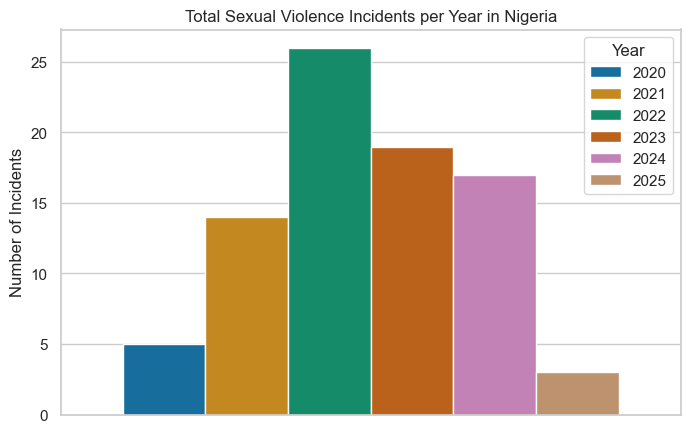

In [18]:
#Incidents per year
plt.figure(figsize=(8,5))
sns.barplot(y='Total Incidents', data=incidents_per_year, palette='colorblind', hue = 'Year')
plt.title('Total Sexual Violence Incidents per Year in Nigeria')
plt.ylabel('Number of Incidents')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_40276\4294584331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Incidents', y='Admin 1', data=incidents_per_state, palette='Blues_r')


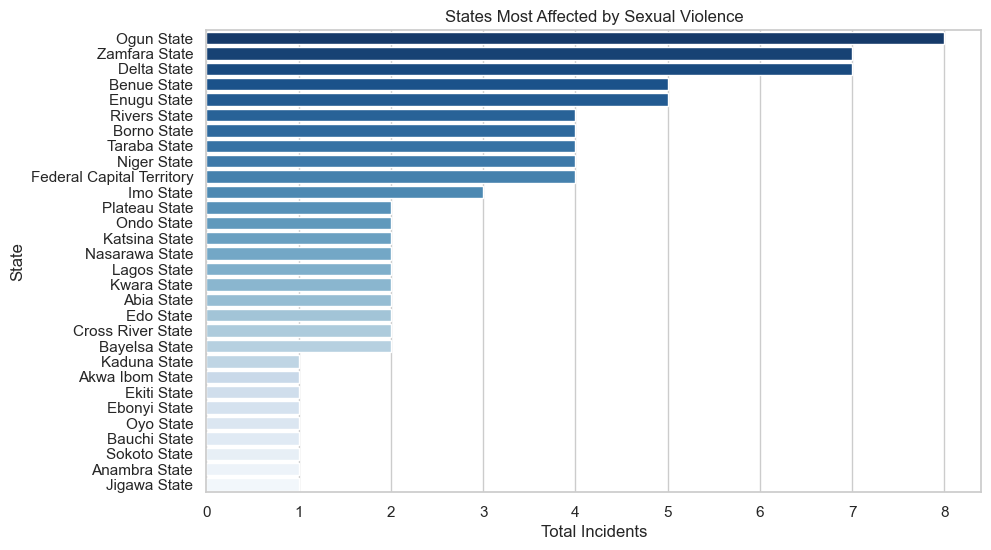

In [24]:
# --- 2. Most affected states ---
plt.figure(figsize=(10,6))
sns.barplot(x='Total Incidents', y='Admin 1', data=incidents_per_state, palette='Blues_r')
plt.title('States Most Affected by Sexual Violence')
plt.xlabel('Total Incidents')
plt.ylabel('State')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_40276\3568540777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Incidents', y='Reported Perpetrator Name', data=incidents_per_perpetrator.head(10), palette='Greens_r')


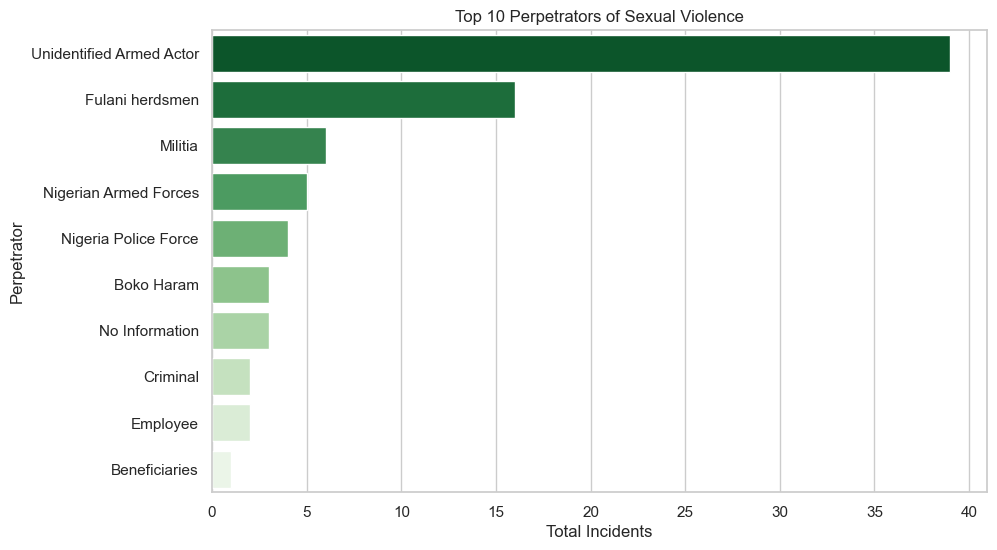

In [25]:
# --- 3. Most frequent perpetrators ---
plt.figure(figsize=(10,6))
sns.barplot(x='Total Incidents', y='Reported Perpetrator Name', data=incidents_per_perpetrator.head(10), palette='Greens_r')
plt.title('Top 10 Perpetrators of Sexual Violence')
plt.xlabel('Total Incidents')
plt.ylabel('Perpetrator')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_40276\1324022709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Adult or Minor ', y='Count', data=victim_age_dist, palette='Purples')


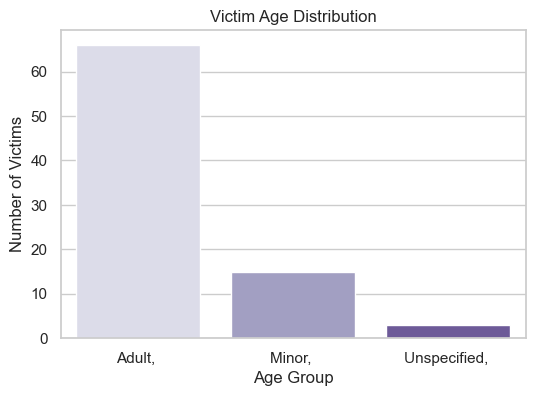

In [27]:
# --- 4. Victim age distribution ---
plt.figure(figsize=(6,4))
sns.barplot(x='Adult or Minor ', y='Count', data=victim_age_dist, palette='Purples')
plt.title('Victim Age Distribution')
plt.ylabel('Number of Victims')
plt.xlabel('Age Group')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_40276\1909387604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Survivor Or Victim Sex', y='Count', data=victim_sex_dist, palette='Oranges')


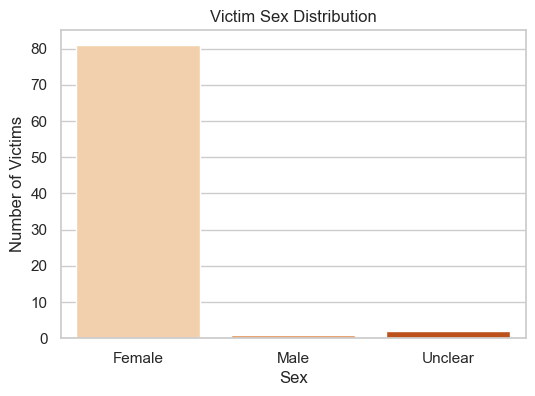

In [28]:

# --- 5. Victim sex distribution ---
plt.figure(figsize=(6,4))
sns.barplot(x='Survivor Or Victim Sex', y='Count', data=victim_sex_dist, palette='Oranges')
plt.title('Victim Sex Distribution')
plt.ylabel('Number of Victims')
plt.xlabel('Sex')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_40276\2385657.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Weapon Carried/Used', data=weapons_dist, palette='coolwarm')


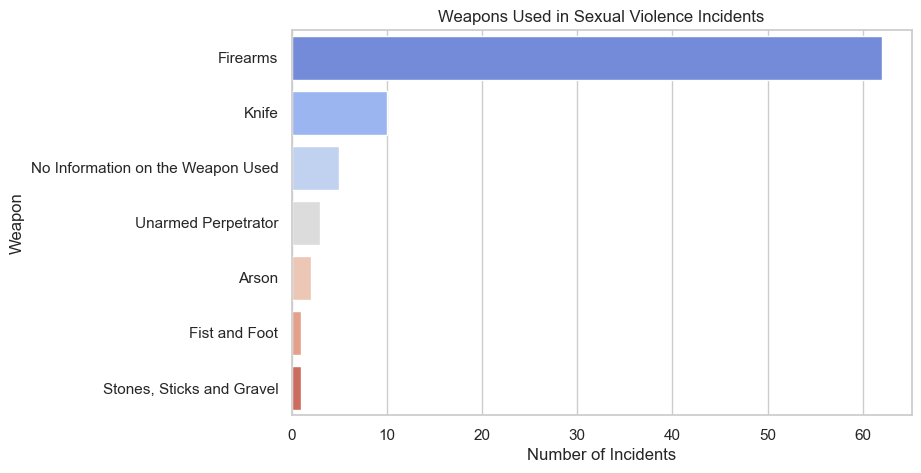

In [29]:

# --- 6. Weapons used ---
plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Weapon Carried/Used', data=weapons_dist, palette='coolwarm')
plt.title('Weapons Used in Sexual Violence Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Weapon')
plt.show()

In [30]:
# --- 7. Percentage of deaths following sexual violence ---
total_incidents = df.shape[0]
total_deaths = df['Reported Deaths Following the Sexual Violence'].sum()

death_percentage = (total_deaths / total_incidents) * 100
print(f"Percentage of reported deaths following sexual violence: {death_percentage:.1f}%")


Percentage of reported deaths following sexual violence: 22.6%


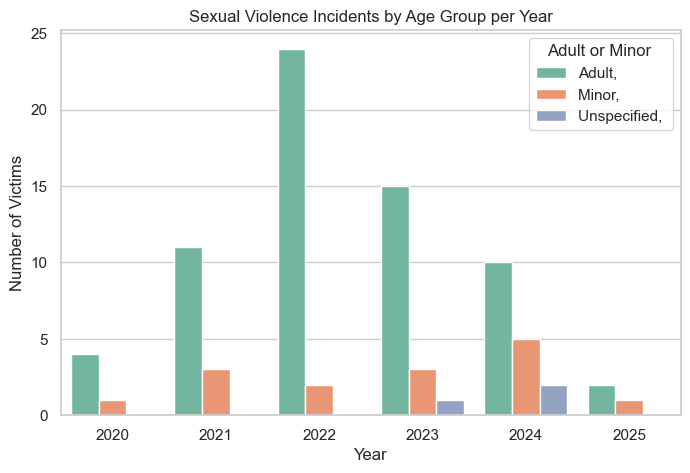

Percentage of minor victims: 0.0%


In [33]:
# Victims by age group per year
age_year = df.groupby(['Year','Adult or Minor ']).size().reset_index(name='Count')

plt.figure(figsize=(8,5))
sns.barplot(x='Year', y='Count', hue='Adult or Minor ', data=age_year, palette='Set2')
plt.title('Sexual Violence Incidents by Age Group per Year')
plt.ylabel('Number of Victims')
plt.xlabel('Year')
plt.show()

# Percentage of minors overall
total_victims = df.shape[0]
minor_victims = df[df['Adult or Minor ']=='Minor'].shape[0]
minor_percentage = (minor_victims / total_victims) * 100
print(f"Percentage of minor victims: {minor_percentage:.1f}%")


C:\Users\HP\AppData\Local\Temp\ipykernel_40276\2177054809.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reported Perpetrator', y='Count', data=perpetrator_type, palette='Set1')


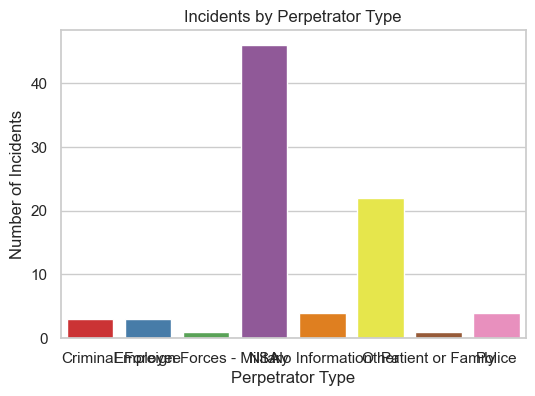

Percentage of incidents involving state actors: 31.0%


In [34]:
# Aggregate by perpetrator type
perpetrator_type = df.groupby('Reported Perpetrator').size().reset_index(name='Count')

plt.figure(figsize=(6,4))
sns.barplot(x='Reported Perpetrator', y='Count', data=perpetrator_type, palette='Set1')
plt.title('Incidents by Perpetrator Type')
plt.ylabel('Number of Incidents')
plt.xlabel('Perpetrator Type')
plt.show()

# Controversial stat: percentage by state actors
state_actor_incidents = df[df['Reported Perpetrator'].isin(['Police','Other'])].shape[0]
state_actor_percentage = (state_actor_incidents / total_incidents) * 100
print(f"Percentage of incidents involving state actors: {state_actor_percentage:.1f}%")


C:\Users\HP\AppData\Local\Temp\ipykernel_40276\1997031438.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Classification', data=assault_type, palette='magma')


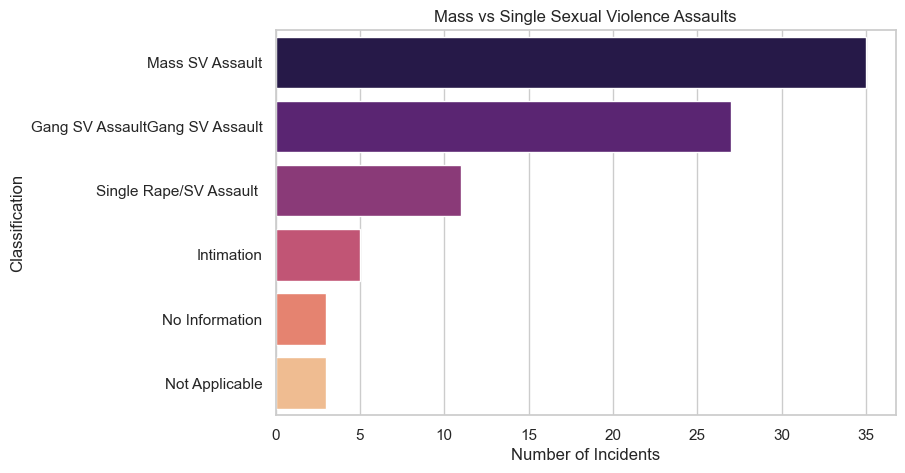

In [35]:
# Count of Mass vs Single assaults
assault_type = df.groupby('Classification').size().reset_index(name='Count').sort_values(by='Count', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Classification', data=assault_type, palette='magma')
plt.title('Mass vs Single Sexual Violence Assaults')
plt.xlabel('Number of Incidents')
plt.ylabel('Classification')
plt.show()


In [36]:
import folium
from folium.plugins import HeatMap, FeatureGroupSubGroup

# Initialize a map centered on Nigeria
nigeria_map = folium.Map(location=[9.0820, 8.6753], zoom_start=6)

# Create a feature group for all incidents
all_incidents = folium.FeatureGroup(name='All Incidents').add_to(nigeria_map)

# Get unique perpetrator types
perp_types = df['Reported Perpetrator'].unique()

# Create a layer for each perpetrator type
for perp in perp_types:
    fg = folium.FeatureGroup(name=f'{perp} Incidents')
    subgroup = FeatureGroupSubGroup(all_incidents, f'{perp} Incidents')
    nigeria_map.add_child(subgroup)
    
    # Filter data for this perpetrator
    perp_df = df[df['Reported Perpetrator'] == perp]
    
    # Add HeatMap for this perpetrator type
    heat_data = perp_df[['Latitude', 'Longitude', 'Number of Reported Victims']].values.tolist()
    HeatMap(heat_data, radius=15, max_zoom=13).add_to(subgroup)
    
    # Add markers with popups
    for idx, row in perp_df.iterrows():
        popup_text = f"""
        <b>State:</b> {row['Admin 1']}<br>
        <b>Year:</b> {row['Date'].year}<br>
        <b>Victims:</b> {row['Number of Reported Victims']}<br>
        <b>Assault Type:</b> {row['Classification']}
        """
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            popup=folium.Popup(popup_text, max_width=250)
        ).add_to(subgroup)

# Add layer control to toggle layers
folium.LayerControl().add_to(nigeria_map)

# Save to HTML
nigeria_map.save('sexual_violence_interactive_heatmap.html')

print("Enhanced interactive heatmap created! Open 'sexual_violence_interactive_heatmap.html'.")


ModuleNotFoundError: No module named 'folium'